In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import mplcyberpunk
import os,sys
import pandas as pd
from scipy.stats.kde import gaussian_kde as kde
## Importing the accompanying utility and analysis files
## point to my utils/analysis code
hbpmloc = '/mnt/c/Users/Alexander/Documents/LIGO/PM/hbpm_v2/'
sys.path.append(os.path.abspath(hbpmloc+'hbpm_utils/'))
from hbpm_utils import *
from importlib import reload
reload(sys.modules["hbpm_utils"])
from hbpm_utils import *
sys.path.append(hbpmloc)
from hbpm_analysis import run_analysis
reload(sys.modules["hbpm_analysis"])
from hbpm_analysis import run_analysis

## my preferred figure settings
matplotlib.rcParams['figure.figsize'] = (8.08, 5.)
matplotlib.rcParams['xtick.labelsize'] = 12.0
matplotlib.rcParams['ytick.labelsize'] = 12.0
matplotlib.rcParams['axes.labelsize'] = 14.0
matplotlib.rcParams['legend.fontsize'] = 12
matplotlib.rcParams['axes.titlesize'] = 16
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=["mediumorchid", "teal", "goldenrod","slategray"])

In [7]:
null_set = pd.read_csv('./validation_data_for_alexander_null.csv',header=0)
post_set = pd.read_csv('./validation_data_for_alexander_post.csv',header=0)

In [15]:
post_set.head()

,dd2_CI,sfhx_CI,sly4_CI,dd2_WD,sfhx_WD,sly4_WD
0,2.539593,2.011358,2.011358,0.139541,0.198394,0.203824


In [16]:
CI_keys = ['sly4_CI','sfhx_CI','dd2_CI']

In [17]:
WD_keys = ['sly4_WD','sfhx_WD','dd2_WD']

In [18]:
eoss = ['sly4','SFHX','dd2']

In [9]:
null_set.head()

,null_CI,null_WD
0,2.458326,0.129961
1,2.377059,0.124745
2,2.377059,0.116979
3,2.417693,0.104934
4,2.316109,0.084845


In [32]:
null_CI_dist = kde(null_set['null_CI'])
null_WD_dist = kde(null_set['null_WD'])

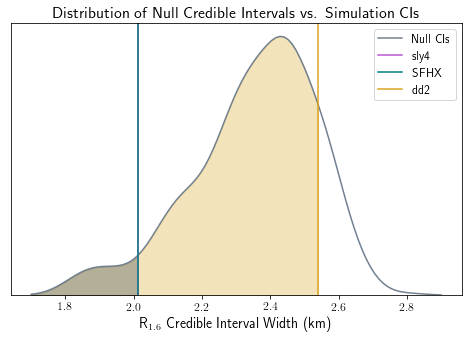

In [65]:
colors=['mediumorchid','teal','goldenrod']
lower = 1.7
upper=2.9
Npoints = 100
CI_xs = np.linspace(lower,upper,Npoints)
CI_maxi = np.argmax(null_CI_dist(CI_xs))
plt.figure()
plt.title('Distribution of Null Credible Intervals vs. Simulation CIs')
# plt.hist(null_set['null_CI'],density=True,color='slategray',alpha=0.6,label='Null CIs')
plt.plot(CI_xs,null_CI_dist.pdf(CI_xs),color='slategray',label='Null CIs')
for key, eos,color in zip(CI_keys,eoss,colors):
    plt.axvline(post_set[key][0],label=eos,color=color)
    fill_xs = np.linspace(lower,post_set[key][0],Npoints)
    plt.fill_between(fill_xs,null_CI_dist.pdf(fill_xs),color=color,label='__nolegend__',alpha=0.3)
plt.ylim(0,)
plt.gca().set_yticks([])
plt.xlabel('R$_{1.6}$ Credible Interval Width (km)')
plt.legend()
plt.savefig('../paper/figures/CI_distribution.png',bbox_inches='tight')
plt.savefig('../paper/figures/CI_distribution.pdf',bbox_inches='tight')
plt.show()

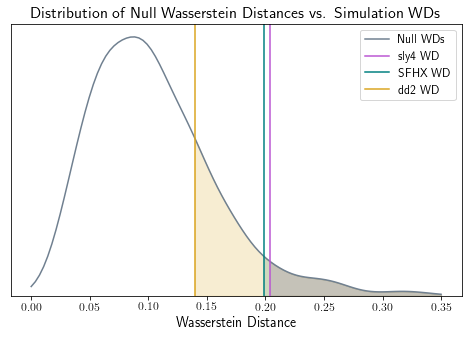

In [59]:
colors=['mediumorchid','teal','goldenrod']
lower = 0
upper = 0.35
Npoints = 100
WD_xs = np.linspace(lower,upper,Npoints)
WD_maxi = np.argmax(null_WD_dist(WD_xs))
plt.figure()
plt.title('Distribution of Null Wasserstein Distances vs. Simulation WDs')
# plt.hist(null_set['null_WD'],density=True,color='slategray',alpha=0.6,label='Null WDs')
plt.plot(WD_xs,null_WD_dist.pdf(WD_xs),color='slategray',label='Null WDs')
for key, eos,color in zip(WD_keys,eoss,colors):
    plt.axvline(post_set[key][0],label=eos+' WD',color=color)
    if post_set[key][0] < WD_xs[WD_maxi]:
        fill_xs = np.linspace(lower,post_set[key][0],Npoints)
    else:
        fill_xs = np.linspace(post_set[key][0],upper,Npoints)
    plt.fill_between(fill_xs,null_WD_dist.pdf(fill_xs),color=color,label='__nolegend__',alpha=0.2)
plt.ylim(0,)
plt.gca().set_yticks([])
plt.xlabel('Wasserstein Distance')
plt.legend()
plt.savefig('../paper/figures/WD_distribution.png',bbox_inches='tight')
plt.savefig('../paper/figures/WD_distribution.pdf',bbox_inches='tight')
plt.show()

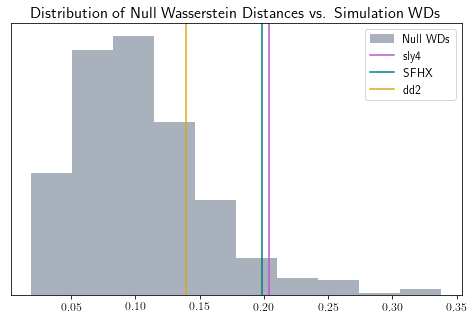

In [30]:
colors=['mediumorchid','teal','goldenrod']
plt.figure()
plt.title('Distribution of Null Wasserstein Distances vs. Simulation WDs')
plt.hist(null_set['null_WD'],density=True,color='slategray',alpha=0.6,label='Null WDs')
for key, eos,color in zip(WD_keys,eoss,colors):
    plt.axvline(post_set[key][0],label=eos,color=color)
plt.gca().set_yticks([])
plt.legend()
plt.show()